In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from numpy.linalg import cholesky
%matplotlib inline

In [2]:
def genData(M, N = 100):
    rnd.seed(0)
    Sigma = np.array([[1, 0], [0, 1]])
    R = cholesky(Sigma)
    
    mu = np.array([[-M, 0]])
    s1 = np.dot(np.random.randn(N, 2), R) + mu
    mu = np.array([[M, 0]])
    s2 = np.dot(np.random.randn(N, 2), R) + mu
    
    return (s1,s2)

In [3]:
def train(w, x, y):
    for i in range(0,x.shape[0]):
        flag = np.sign(w[0] + np.dot(w[1:],x[i].T))
        if flag != y:
            w[0] += y
            w[1:] += y * x[i]
    return w

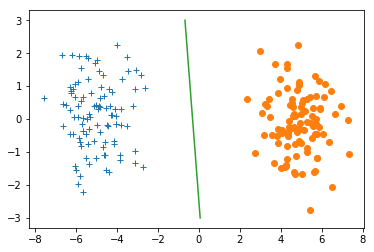

In [4]:
N = 100
mean = 5
(s1, s2) = genData(mean, N)
w = np.zeros(s1.shape[1] + 1)

train(w, s1, -1)
train(w, s2, +1)

y = np.linspace(-3,3)
x = (w[0] + w[2] * y)/w[1]


plt.plot(s1[:,0],s1[:,1],'+')
plt.plot(s2[:,0],s2[:,1],'o')
plt.plot(x,y)
plt.show()
